# Task No. 2 Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

# Load liberary/Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
display("duplicated:",df.duplicated().sum())

'duplicated:'

0

In [8]:
X= df.iloc[:, [3,4]].values

In [10]:
from sklearn.cluster import KMeans

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# Drop non-numeric columns for clustering
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from scipy.cluster.vq import kmeans, vq

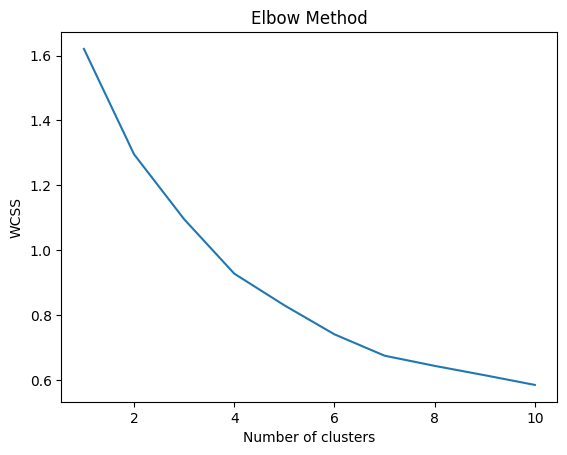

     CustomerID  Cluster
0             1        2
1             2        1
2             3        2
3             4        1
4             5        2
..          ...      ...
195         196        0
196         197        3
197         198        0
198         199        3
199         200        0

[200 rows x 2 columns]


In [21]:
# Determine the optimal number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    centroids, distortion = kmeans(X_scaled, i)
    wcss.append(distortion)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow Method, let's choose k=5
k = 5

# Apply k-means clustering with the chosen k
centroids, _ = kmeans(X_scaled, k)
df['Cluster'], _ = vq(X_scaled, centroids)

# Display the resulting clusters
print(df[['CustomerID', 'Cluster']])

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

In [30]:
df['Cluster'] = clusters

C:\Users\91988\AppData\Local\Temp\ipykernel_24416\3130883640.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],


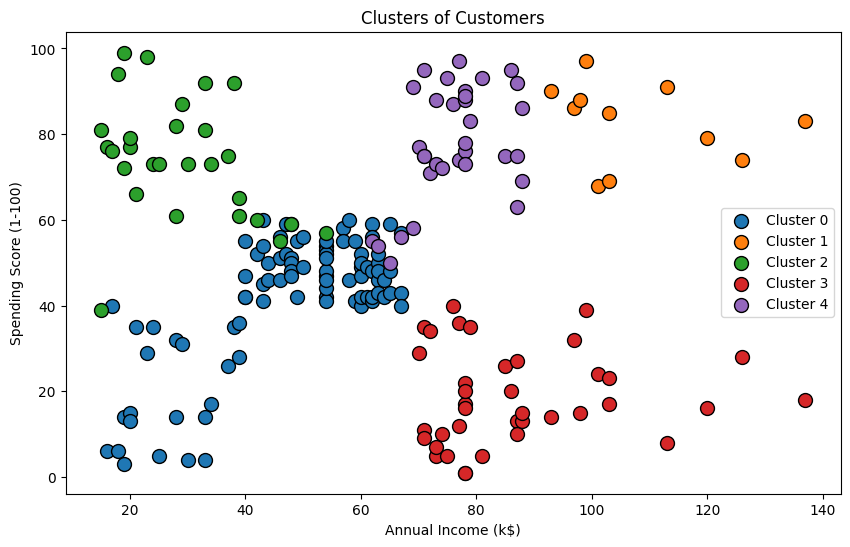

In [31]:
plt.figure(figsize=(10, 6))

for cluster_num in range(5):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_num}', cmap='viridis', marker='o', edgecolors='black', s=100)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
age = float(input("Enter customer's age: "))
income = float(input("Enter customer's annual income (in k$): "))
spending_score = float(input("Enter customer's spending score (1-100): "))

user_data = pd.DataFrame({'Age': [age], 'Annual Income (k$)': [income], 'Spending Score (1-100)': [spending_score]})

user_cluster = kmeans.predict(user_data)[0]
print("The user's data belongs to Cluster:", user_cluster)

Enter customer's age:  45
Enter customer's annual income (in k$):  10000
Enter customer's spending score (1-100):  5000


The user's data belongs to Cluster: 1


In [33]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [34]:
X=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]

In [35]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [36]:
y.head()

0    2
1    2
2    0
3    2
4    0
Name: Cluster, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [42]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [43]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

In [44]:
y_pred=gbdt.predict(X_test)
y_pred

array([0, 2, 0, 3, 3, 0, 0, 3, 3, 2, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 4, 3, 2, 0, 0, 0, 3, 0, 4, 4, 3, 0])

In [45]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,0,0
15,2,2
30,0,0
158,3,3
128,3,3
115,4,0
69,0,0
170,3,3
174,3,3
45,2,2
